In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.losses import mean_absolute_percentage_error

Using TensorFlow backend.


In [2]:
# watch for any changes in the utils module, and reload it automatically
%load_ext autoreload
%autoreload 2

In [23]:
from utils.generate_models import generate_models, generate_DeepConvLSTM_model
from utils.validate_models import find_best_architecture, evaluate_model, evaluate_plot
from utils.data_generator import DataGenerator
from utils.get_dataset_pulsi import get_dataset_pulsi

In [4]:
columns = np.array(['bpm', 'spo2'])
dataset_reduced_std, dataset_reduced = get_dataset_pulsi(columns,
                                                         filename='./utils/test_data/42nights.csv')

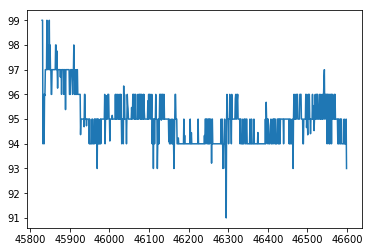

In [5]:
plt.plot(dataset_reduced[dataset_reduced["name"] == 'h_17-04-27']["spo2"])

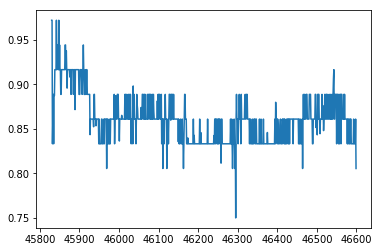

In [6]:
plt.plot(dataset_reduced_std[dataset_reduced_std["name"] == 'h_17-04-27']["spo2"])

In [7]:
window_size = 12            # ventana de valores para la prediccion
dim_length = window_size
number_of_predictions = 4   # numero de predicciones en la salida
output_dim = number_of_predictions
target_variable = "spo2"
dim_channels = 2            # 2 variables

In [8]:
#cv_fold_size = len(val_gen)*batch_size
batch_size = 32
metric = mean_absolute_percentage_error

In [9]:
train_names_reduced = np.array(['p_17-01-19', 'p_17-01-20'])
val_names_reduced = np.array(['p_17-01-21'])
test_names_reduced = np.array(['p_17-01-22'])
train_gen_reduced = DataGenerator(dataset_reduced_std, train_names_reduced,
                                  "spo2", batch_size=batch_size,
                                  number_of_predictions=number_of_predictions,
                                  window_size=window_size,
                                  step_prediction_dates=1, shuffle=False,
                                  shuffle_and_sample=False, debug=False)
val_gen_reduced = DataGenerator(dataset_reduced_std, val_names_reduced,
                                "spo2", batch_size=batch_size,
                                number_of_predictions=number_of_predictions,
                                window_size=window_size,
                                step_prediction_dates=1, shuffle=False,
                                shuffle_and_sample=False, debug=False)
test_gen_reduced = DataGenerator(dataset_reduced_std, test_names_reduced,
                                 "spo2", batch_size=batch_size,
                                 number_of_predictions=number_of_predictions,
                                 window_size=window_size,
                                 step_prediction_dates=1, shuffle=False,
                                 shuffle_and_sample=False, debug=False)

In [10]:
# simple
hyperparameters_simple = {}
regularization_rate_simple = 10 ** -4 # max bound
hyperparameters_simple['regularization_rate'] = regularization_rate_simple
learning_rate_simple = 10 ** -4 # max bound
hyperparameters_simple['learning_rate'] = learning_rate_simple
filters_simple = []
hyperparameters_simple['filters'] = filters_simple
lstm_dims_simple = [100]
hyperparameters_simple['lstm_dims'] = lstm_dims_simple

dropout_rnn_simple = 0.75
dropout_cnn_simple = 0.75

nrepochs_simple = 150

In [11]:
model = generate_DeepConvLSTM_model(dim_length, dim_channels, output_dim,
                                    filters_simple, lstm_dims_simple, learning_rate_simple,
                                    regularization_rate_simple, dropout=None,
                                    dropout_rnn=dropout_rnn_simple, dropout_cnn=dropout_cnn_simple,
                                    metrics=[mean_absolute_percentage_error])

models_simple = [(model, hyperparameters_simple)]

In [12]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                           verbose=False, number_of_models=None, nr_epochs=nrepochs_simple,
                           early_stopping=True, batch_size=batch_size,
                           models=models_simple, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

In [13]:
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.017248125164348982, 289861.9570350448]
validation error = [0.009724878851532837, 7.6608091424481515]
testing error = [0.00903963883431604, 7.45062520452392]


In [14]:
# from GC_find_best_arch_250_rnn_1_pulsi
hyperparameters_losses = {}
regularization_rate_losses = 0.0001
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0089
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = []
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [63]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.85
dropout_cnn_losses = None

nrepochs_losses = 58

In [22]:
# from GC_find_best_arch_250_rnn_1_cnn_1_pulsi / lossses
hyperparameters_losses = {}
regularization_rate_losses = 0.0666
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0006
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [78]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [100]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.74
dropout_cnn_losses = 0.27

nrepochs_losses = 96

In [14]:
# from GC_find_best_arch_250_rnn_1_cnn_1_pulsi / metrics (MAPE)
hyperparameters_losses = {}
regularization_rate_losses = 0.0303
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0012
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [82]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [71]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.61
dropout_cnn_losses = 0.30

nrepochs_losses = 70

In [14]:
# from GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics (MAPE)
hyperparameters_losses = {}
regularization_rate_losses = 0.01
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.00075
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [58, 78]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [34]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.34
dropout_cnn_losses = 0.66

nrepochs_losses = 108

In [14]:
# from GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
hyperparameters_losses = {}
regularization_rate_losses = 0.0006
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.024
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [46, 12]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [33, 41, 14]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.40
dropout_cnn_losses = 0.255

nrepochs_losses = 50

In [14]:
# from GC_find_best_arch_250_rnn_4_cnn_4_pulsi / metric
hyperparameters_losses = {}
regularization_rate_losses = 0.031
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0007
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [63, 33, 40, 98]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [77]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.61
dropout_cnn_losses = 0.43

nrepochs_losses = 89

In [15]:
model = generate_DeepConvLSTM_model(dim_length, dim_channels, output_dim,
                                    filters_losses, lstm_dims_losses, learning_rate_losses,
                                    regularization_rate_losses, dropout=None,
                                    dropout_rnn=dropout_rnn_losses, dropout_cnn=dropout_cnn_losses,
                                    metrics=[mean_absolute_percentage_error])
models_losses = [(model, hyperparameters_losses)]

In [16]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                           verbose=False, number_of_models=None, nr_epochs=nrepochs_losses,
                           early_stopping=True, batch_size=batch_size,
                           models=models_losses, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

In [17]:
# results for GC_find_best_arch_250_rnn_1_pulsi
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.003933607993384996, 362083.972369503]
validation error = [0.006722083426708528, 8.007422620491276]
testing error = [0.005522807846873902, 6.732948109804294]


In [25]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / lossses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.01001212754728372, 336980.693468827]
validation error = [0.003796901011181281, 4.860276826939786]
testing error = [0.004868344708398242, 6.207061390030436]


In [31]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.004377694841996224, 354969.1952203439]
validation error = [0.0038153579661470145, 4.944996087473437]
testing error = [0.0036001515617590093, 4.864875514063484]


In [17]:
# results for GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.003798364245511116, 347415.0207172472]
validation error = [0.004121919605474835, 5.241786796447129]
testing error = [0.0035476204451350937, 4.665435738687392]


In [17]:
# results for GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.004798060559078046, 367094.5736506878]
validation error = [0.005217997843334288, 6.282016994361591]
testing error = [0.004678894991021869, 5.6636909271215465]


In [17]:
# results for GC_find_best_arch_250_rnn_4_cnn_4_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.00527602289693033, 360718.39990691724]
validation error = [0.00426426310902936, 5.264034291556604]
testing error = [0.004200587278530324, 5.5502945044339995]


In [18]:
# full dataset
train_names = np.array(['p_17-01-19', 'p_17-01-20', 'p_17-01-21', 'p_17-01-22', 'p_17-01-23', 'p_17-01-24', 'p_17-01-25',
                        'p_17-01-26', 'p_17-01-27', 'p_17-01-28', 'p_17-01-29', 'p_17-01-30', 'p_17-01-31', 'p_17-02-01',
                        'p_17-02-02', 'p_17-02-03', 'p_17-02-04', 'p_17-02-05', 'p_17-02-06', 'p_17-02-07', 'p_17-02-08',
                        'p_17-02-09', 'p_17-02-10'])
val_names = np.array(['p_17-02-11', 'p_17-02-12', 'p_17-02-13', 'p_17-02-14', 'p_17-02-15', 'p_17-02-16', 'p_17-02-17', 'p_17-02-18'])
test_names = np.array(['p_17-02-19', 'p_17-02-20', 'p_17-02-21', 'p_17-02-22', 'p_17-02-23', 'p_17-02-24', 'p_17-02-25', 'p_17-04-27'])
train_gen = DataGenerator(dataset_reduced_std, train_names,
                          "spo2", batch_size=batch_size,
                          number_of_predictions=number_of_predictions,
                          window_size=window_size,
                          step_prediction_dates=1, shuffle=False,
                          shuffle_and_sample=False, debug=False)
val_gen = DataGenerator(dataset_reduced_std, val_names,
                        "spo2", batch_size=batch_size,
                        number_of_predictions=number_of_predictions,
                        window_size=window_size,
                        step_prediction_dates=1, shuffle=False,
                        shuffle_and_sample=False, debug=False)
test_gen = DataGenerator(dataset_reduced_std, test_names,
                         "spo2", batch_size=batch_size,
                         number_of_predictions=number_of_predictions,
                         window_size=window_size,
                         step_prediction_dates=1, shuffle=False,
                         shuffle_and_sample=False, debug=False)

In [19]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen, val_gen, test_gen,
                           verbose=True, number_of_models=None, nr_epochs=500, # let early stopping decide
                           early_stopping=True, batch_size=batch_size,
                           models=models_losses, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

Training model 0
{'regularization_rate': 0.031, 'learning_rate': 0.0007, 'filters': [63, 33, 40, 98], 'lstm_dims': [77]}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 12, 2)             8         
_________________________________________________________________
reshape_1 (Reshape)          (None, 12, 2, 1)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 2, 63)         252       
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 2, 63)         252       
_________________________________________________________________
activation_1 (Activation)    (None, 12, 2, 63)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 2, 63)         0         
_____________________

In [20]:
# results for GC_find_best_arch_250_rnn_1_pulsi
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.004192306253131242, 33433.474443188505]
validation error = [0.004075199329610853, 5.463103092647285]
testing error = [0.0031674948526701162, 4.6072388883698085]


In [27]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.0036395244816228006, 31996.99257929632]
validation error = [0.0034127099007392812, 4.776353999459052]
testing error = [0.003428195424268057, 4.783790687888302]


In [19]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.003710460062299613, 32655.366962701133]
validation error = [0.0034745125839786726, 4.800564820781769]
testing error = [0.0031040624695413076, 4.458385023674441]


In [20]:
# results for GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.004474787401960395, 349106.50905561354]
validation error = [0.0033583615298881666, 4.5834193100208225]
testing error = [0.003675531248816035, 5.3873592527397784]


In [20]:
# results for GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.010103042537682221, 338490.1580989031]
validation error = [0.004099444931632868, 5.926653173433908]
testing error = [0.0056932556761420654, 7.3281114359438675]


In [ ]:
# results for GC_find_best_arch_250_rnn_4_cnn_4_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.0051723596583289145, 359922.044583339]
validation error = [0.003981846794540509, 5.1386676563654925]
testing error = [0.003977576767656856, 5.5361247447662025]


ValueError: x and y can be no greater than 2-D, but have shapes (1,) and (1, 1197, 4)

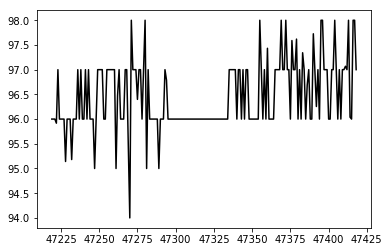

In [24]:
evaluate_plot(dataset_reduced, val_predict, test_predict,
              target_variable=target_variable, metric=mean_absolute_percentage_error)

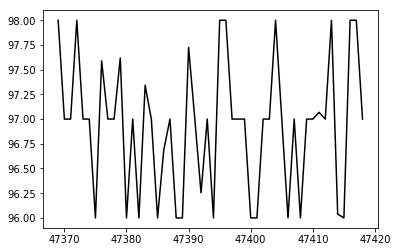

In [29]:
plot_window=50



val_size = len(val_predict)
val_length = 0 if val_size == 0 else val_predict.shape[1]
test_size = len(test_predict)
test_length = test_predict.shape[1]

# plot original series
original_series_2plot = dataset_reduced
max_series_limit = original_series_2plot.shape[0]
plt.plot(np.arange(max_series_limit-plot_window,
                   max_series_limit, 1),
         original_series_2plot[max_series_limit-plot_window:max_series_limit][target_variable],
         color = 'k')

In [34]:
do_denormalize = True
from utils.validate_models import de_normalize_prediction



split_pt = max_series_limit - val_length - test_length

# plot validation set prediction
# if val_predict is an empty list it means there is no validation set
val_predict_2plot = val_predict
if val_size != 0:
    if do_denormalize:
        val_predict_dolar = de_normalize_prediction(original_series, val_predict[prediction],
                                                    target_variable)
        val_predict_2plot = val_predict_dolar
    elif prediction is not None:
        val_predict_2plot = val_predict[prediction]
plt.plot(np.arange(split_pt,
                   split_pt + len(val_predict_2plot),1),
         val_predict_2plot, color = 'y')

NameError: name 'original_series' is not defined

In [ ]:
    # plot test set prediction
    test_predict_2plot = test_predict
    if do_denormalize and y_test is not None:
        y_test_dolar = de_normalize_prediction(original_series, y_test[prediction],
                                               target_variable)
        test_predict_dolar = de_normalize_prediction(original_series, test_predict[prediction],
                                                     target_variable)
        test_predict_2plot = test_predict_dolar
    elif prediction is not None:
        test_predict_2plot = test_predict[prediction]
    plt.plot(np.arange(split_pt + len(val_predict_2plot),
                       split_pt + len(val_predict_2plot) + len(test_predict_2plot),1),
             test_predict_2plot, color = 'r')

    # evaluate RMSE/correlation
    title = None
    rmse_test = None
    corr_test = None
    if metric is None:
        metric = corr

    if y_test is not None:
        if do_denormalize:
            rmse_test = np.sqrt(mean_squared_error(y_test_dolar, test_predict_dolar))
            corr_test = metric(y_test_dolar, test_predict_dolar)
        else:
            rmse_test = np.sqrt(mean_squared_error(y_test[prediction], test_predict[prediction]))
            corr_test = metric(y_test[prediction], test_predict[prediction])

    title="RMSE= " + str(rmse_test) + ", " + metric.__name__ + "= " + str(corr_test)

    # pretty up graph
    plt.xlabel('day')
    plt.ylabel(target_variable)
    if val_size != 0:
        plt.legend(['original series', 'validation fit', 'testing fit'],
                   loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        plt.legend(['original series', 'testing fit'],
                   loc='center left', bbox_to_anchor=(1, 0.5))

    if title is not None:
        plt.title(title)
    if do_plot:
        plt.show()